In [2]:
import numpy as np

def generate_clustered_data(num_samples, num_clusters, num_features, cluster_spread=0.05):
    # Create random centers within a unit square (or cube, hypercube, etc.)
    centers = np.random.rand(num_clusters, num_features)
    # Generate points around these centers
    data = np.vstack([np.random.normal(loc=center, scale=cluster_spread, size=(num_samples // num_clusters, num_features))
                      for center in centers])
    # If num_samples isn't perfectly divisible by num_clusters, add some more points
    if num_samples % num_clusters != 0:
        extra_points = np.random.normal(loc=centers[0], scale=cluster_spread,
                                        size=((num_samples % num_clusters), num_features))
        data = np.vstack([data, extra_points])
    np.random.shuffle(data)  # Shuffle the dataset to mix clusters
    return data

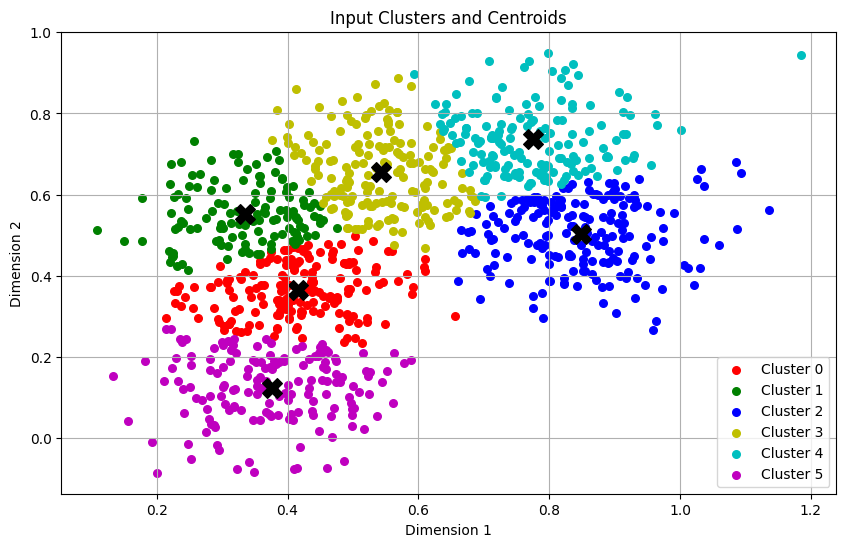

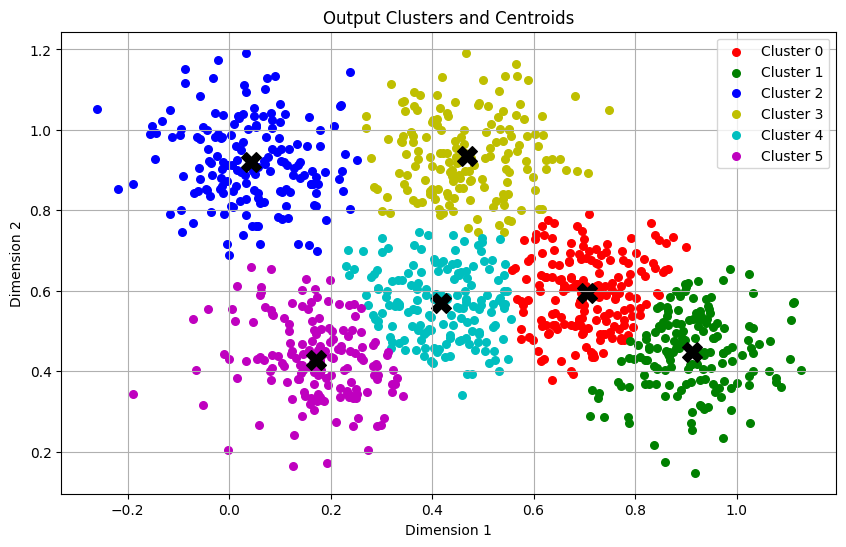

Predicted output: [0.04232571 0.92060582]


In [6]:
import numpy as np
from bkm_utils_2d import *

K = 6  # Number of clusters
num_samples = 1000  # Total samples
num_features = 2    # Number of features

# Generate random clustered data for X and Y with small in-group variance
X = generate_clustered_data(num_samples, K, num_features, cluster_spread=0.1)
Y = generate_clustered_data(num_samples, K, num_features, cluster_spread=0.1)
supervised_fraction = 0.1  # 10% as the supervised subset

# Train and build the bridge between X and Y
x_clusters, y_clusters, x_centroids, y_centroids, bridge = train_and_build_bridge(X, Y, K, supervised_fraction)

# Visualization of the X clusters and centroids
plot_clusters(X, x_clusters, x_centroids, title='Input Clusters and Centroids')

# Visualization of the Y clusters and centroids
plot_clusters(Y, y_clusters, y_centroids, title='Output Clusters and Centroids')

# Predicting for a new input
new_x = np.random.rand(2)  # Ensure this matches your data dimensions for visualization
predicted_output = predict(new_x, x_centroids, bridge, y_centroids)
print('Predicted output:', predicted_output)